### NLP Assignment - Problem Statement - 6

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk import Tree
from nltk.chunk import ne_chunk
from nltk.grammar import PCFG
from nltk.parse import ViterbiParser
#from nltk.grammar import toy_pcfg1 # toy_pcfg1 is one such parse tree created on dummy data.
#from nltk.grammar import toy_pcfg2
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

#### Read the CSV file

In [3]:
# Read the CSV file into a DataFrame
file_path = 'chennai_reviews.csv'
df = pd.read_csv(file_path)

#### Describe the Data set head

In [4]:
# Display the first few rows (head) of the DataFrame
df_head = df.head()
df_head

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100,NaN,NaN,NaN,NaN
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20,NaN,NaN,NaN,NaN
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20,NaN,NaN,NaN,NaN
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100,NaN,NaN,NaN,NaN
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100,NaN,NaN,NaN,NaN


#### No. of rows, columns, and attributes. Plot the graph for the sentiment column

In [10]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Get the column names (attributes)
column_names = df.columns.tolist()


print ("No of Rows : " ,  num_rows)
print ("No of Cols :" , num_columns) 
print("List of Columns :" , column_names)

No of Rows :  4768
No of Cols : 9
List of Columns : ['Hotel_name', 'Review_Title', 'Review_Text', 'Sentiment', 'Rating_Percentage', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']


In [14]:
df.describe()

,Unnamed: 5,Unnamed: 7,Unnamed: 8
count,64.000000,1.0,1.0
mean,71.187500,2.0,60.0
std,21.138902,NaN,NaN
min,3.000000,2.0,60.0
25%,59.250000,2.0,60.0
50%,71.000000,2.0,60.0
75%,86.000000,2.0,60.0
max,100.000000,2.0,60.0


In [34]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4767 entries, 0 to 4767
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hotel_name           4767 non-null   object 
 1   Review_Title         4340 non-null   object 
 2   Review_Text          4767 non-null   object 
 3   Sentiment            4766 non-null   object 
 4   Rating_Percentage    4767 non-null   object 
 5   Unnamed: 5           64 non-null     float64
 6   Unnamed: 6           2 non-null      object 
 7   Unnamed: 7           0 non-null      float64
 8   Unnamed: 8           0 non-null      float64
 9   Cleaned_Review_Text  4767 non-null   object 
dtypes: float64(3), object(7)
memory usage: 409.7+ KB


In [37]:
missing_val_df = pd.DataFrame().from_records([{'Column Name':col, 
                                               'Missing Values': len(df[df[col].isna()]), 
                                               'Missing Values (%)':np.round(len(df[df[col].isna()])/len(df), 4)*100}
                                              for col in df.columns])
print('Missing values :')
missing_val_df

Missing values :


,Column Name,Missing Values,Missing Values (%)
0,Hotel_name,0,0.00
1,Review_Title,427,8.96
2,Review_Text,0,0.00
3,Sentiment,1,0.02
4,Rating_Percentage,0,0.00
5,Unnamed: 5,4703,98.66
6,Unnamed: 6,4765,99.96
7,Unnamed: 7,4767,100.00
8,Unnamed: 8,4767,100.00
9,Cleaned_Review_Text,0,0.00


#### Plotting the Sentiment Column

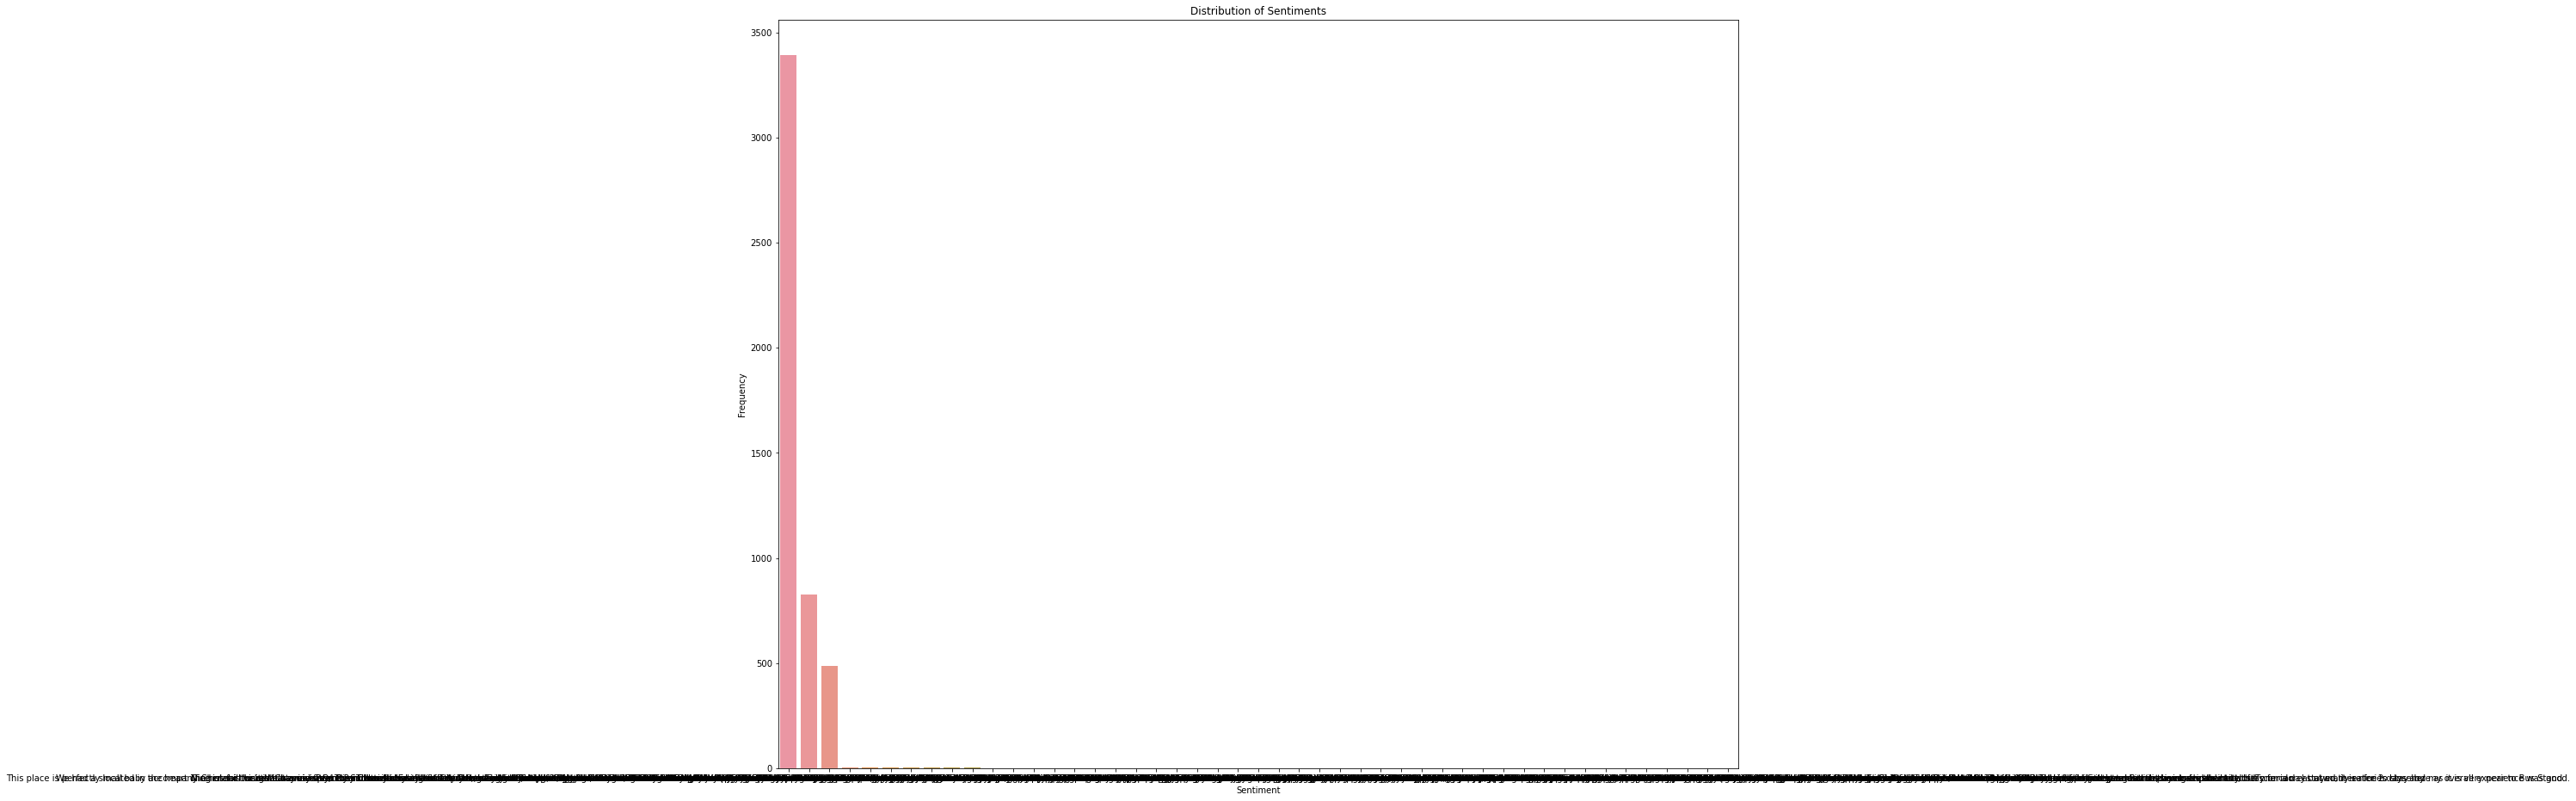

In [17]:
# Check if the 'Sentiment' column exists in the dataset
if 'Sentiment' in df.columns:
    # Plot the graph for the "Sentiment" column
    plt.figure(figsize=(20, 16))
    sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
    plt.title('Distribution of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.show()
else:
    plot_message = "The 'Sentiment' column is not present in the dataset."
    plot_message


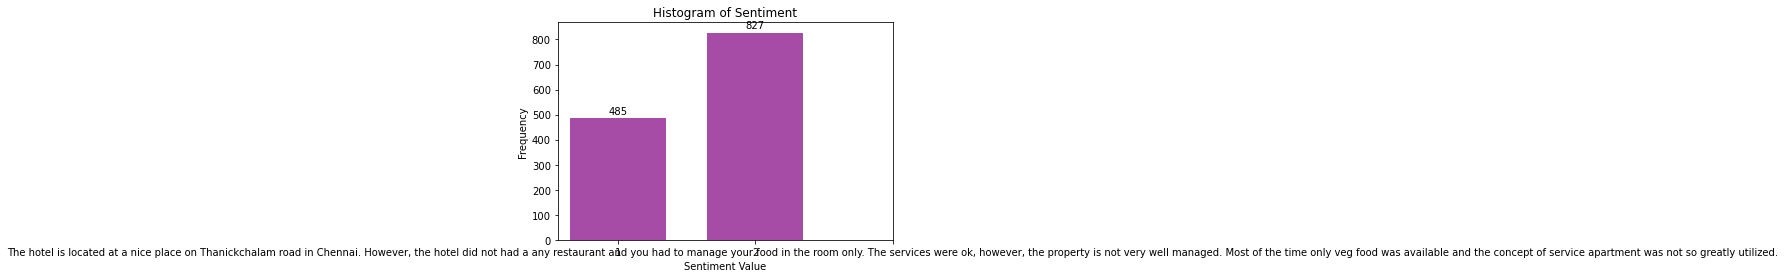

,Sentiment Value,Count
0,they do not come inside,1
1,as everything served gives a feeling of havin...,1
2,but it did not meet my expectations. It took ...,1
3,comfy rooms,1
4,excellent food. clean rooms. for some reason ...,1
5,food is very good.,1
6,in good location with all access to malls and...,4
7,the service is mind blowing! Yummy and delici...,4
8,1,485
9,2,827


In [48]:
# Plot histogram for the Sentiment column
# Calculate the histogram data
values, bins, patches = plt.hist(df['Sentiment'].dropna(), bins=np.arange(0.5, 3, 1), color='purple', alpha=0.7, rwidth=0.7, align='mid')
#plt.figure(figsize=(20, 16))
# Annotate each bar with its height value
for i in range(len(values)):
    plt.text(bins[i] + 0.5, values[i] + 10, str(int(values[i])), ha='center', va='bottom', fontsize=10)

plt.title("Histogram of Sentiment")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency")
plt.xticks([1, 2, 3])
plt.grid(False)
plt.show()
# Count rows by value in the Sentiment column
sentiment_counts = df['Sentiment'].value_counts().sort_index()

# Display the counts in a table format
sentiment_counts_table = pd.DataFrame(sentiment_counts).reset_index()
sentiment_counts_table.columns = ["Sentiment Value", "Count"]
sentiment_counts_table



In [49]:
# Initialize the list of stop words
stop_words = set(stopwords.words('english'))
# Function to clean the text
def clean_text(text):
    # Remove HTML tags using regular expression
    text = re.sub('<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
# Drop rows where 'Review_Text' is NaN
df = df.dropna(subset=['Review_Text'])
# Apply the clean_text function to the 'Review_Text' column
df['Cleaned_Review_Text'] = df['Review_Text'].apply(clean_text)
# Display the first few rows to show the cleaned 'Review_Text'
df[['Review_Text', 'Cleaned_Review_Text']].head(10)

,Review_Text,Cleaned_Review_Text
0,Its really nice place to stay especially for b...,really nice place stay especially business tou...
1,It seems that hotel does not check the basic a...,seems hotel check basic amenities room handing...
2,Worst hotel I have ever encountered. I will ne...,worst hotel ever encountered never think stay ...
3,Had a good time in this hotel and the staff Ku...,good time hotel staff kumaraishwarya house kee...
4,good hotel and staff Veg food good non veg bre...,good hotel staff veg food good non veg breakfa...
5,Great hotel. The staff if welcoming. Helpful. ...,great hotel staff welcoming helpful always
6,"The hotel is mostly clean, but bathrooms need ...",hotel mostly clean bathrooms need care first b...
7,Awesome hotel with all needed amenities and lu...,awesome hotel needed amenities luxury friendly...
8,Very nice \nComfortable,nice comfortable
9,The staff of the hotel were polite. The brick...,staff hotel polite brick oven chefs extremely ...


In [53]:

# Function to display a sparse tree (parse tree) for a sentence
def display_parse_tree(sentence):
    # Tokenize and POS Tag
    tokenized_sentence = word_tokenize(sentence)
    pos_tags = pos_tag(tokenized_sentence)
    
    # Named Entity Recognition (NER) to generate a sparse tree
    parse_tree = ne_chunk(pos_tags)
    
    return parse_tree

# Extract the first 4 rows from the 'Review_Text' column
df['Review_Text']=df['Cleaned_Review_Text']
first_four_reviews = df['Review_Text'].head(4)

# Initialize an empty dictionary to hold the POS tags and parse trees
review_pos_tags = {}
review_parse_trees = {}
# Tokenize and POS tag each review
tagged_reviews = [pos_tag(word_tokenize(review)) for review in first_four_reviews]

# Print the tokens and their POS tags
for tags in tagged_reviews:
    print(tags)
    print("\n")

# Display a tree for each tagged review
for tags in tagged_reviews:
    tree = Tree('S', tags)
    tree.pretty_print()

# # Apply POS tagging and generate parse trees for each of the first 4 reviews
# for i, review in enumerate(first_four_reviews):
#     # Tokenize the words in the review
#     tokens = word_tokenize(review)
    
#     # Get the POS tags
#     pos_tags = pos_tag(tokens)
    
#     # Get the sparse tree (parse tree)
#     parse_tree = display_parse_tree(review)
    
#     # Save the POS tags and parse trees in the dictionary
#     review_pos_tags[f'Review_{i+1}'] = pos_tags
#     review_parse_trees[f'Review_{i+1}'] = parse_tree

# # Display the POS tags for the first 4 reviews
# review_pos_tags


[('really', 'RB'), ('nice', 'JJ'), ('place', 'NN'), ('stay', 'NN'), ('especially', 'RB'), ('business', 'NN'), ('tourist', 'NN'), ('purpose', 'NN')]


[('seems', 'VBZ'), ('hotel', 'NN'), ('check', 'NN'), ('basic', 'JJ'), ('amenities', 'NNS'), ('room', 'NN'), ('handing', 'VBG'), ('room', 'NN'), ('traveller', 'NN'), ('phone', 'NN'), ('room', 'NN'), ('working', 'VBG'), ('created', 'VBN'), ('problem', 'NN'), ('hectic', 'JJ'), ('day', 'NN'), ('travel', 'NN'), ('would', 'MD'), ('like', 'VB'), ('relax', 'JJ'), ('work', 'NN'), ('pace', 'NN'), ('sent', 'VBD'), ('technician', 'JJ'), ('kept', 'NN'), ('looking', 'VBG'), ('fix', 'JJ'), ('hour', 'NN'), ('get', 'NN'), ('room', 'NN'), ('changed', 'VBD')]


[('worst', 'JJS'), ('hotel', 'NN'), ('ever', 'RB'), ('encountered', 'VBD'), ('never', 'RB'), ('think', 'VBP'), ('stay', 'JJ'), ('thiis', 'JJ'), ('hotel', 'NN'), ('future', 'NN')]


[('good', 'JJ'), ('time', 'NN'), ('hotel', 'NN'), ('staff', 'NN'), ('kumaraishwarya', 'NN'), ('house', 'NN'), ('keeping'

#### Parse the first 4 rows of ‘v2’ using Viterbi Parser ( [Use toy_pcfg1 and toy_pcfg2 to get the probabilistic context-free grammars; use the PCFG suitable for each sentence]

In [85]:
sentences = df['Review_Text'].head(1).dropna().tolist()
sentences

['really nice place stay especially business tourist purpose']

In [86]:
# # Define toy_pcfg1 and toy_pcfg2
# toy_pcfg1 = PCFG.fromstring("""
#     S -> NP VP [1.0]
#     NP -> Det N [0.5]| NP PP [0.25] | 'John' [0.1] | 'I' [0.15]
#     Det -> 'the' [0.8] | 'my' [0.2]
#     N -> 'man' [0.5] | 'telescope' [0.5]
#     VP -> VP PP [0.1] | V NP [0.7] | V [0.2]
#     V -> 'ate' [0.35] | 'saw' [0.65]
#     PP -> P NP [1.0]
#     P -> 'with' [0.61] | 'under' [0.39]
# """)

# toy_pcfg2 = PCFG.fromstring("""
#     S -> NP VP [1.0]
#     NP -> Det N [0.4] | NP PP [0.3] | 'John' [0.1] | 'I' [0.2]
#     Det -> 'the' [0.6] | 'my' [0.4]
#     N -> 'man' [0.7] | 'telescope' [0.3]
#     VP -> VP PP [0.1] | V NP [0.6] | V [0.3]
#     V -> 'ate' [0.45] | 'saw' [0.55]
#     PP -> P NP [1.0]
#     P -> 'with' [0.7] | 'under' [0.3]
# """)
# #Define toy_pcfg1 and toy_pcfg2
# toy_pcfg1 = nltk.PCFG.fromstring("""
#     S -> NP VP [1.0]
#     NP -> Det N [0.5] | NP PP [0.25] | 'John' [0.1] | 'I' [0.15]
#     Det -> 'an' [0.3] | 'my' [0.7]
#     N -> 'elephant' [0.6] | 'pajamas' [0.4]
#     VP -> V NP [0.7] | VP PP [0.3]
#     V -> 'shot' [1.0]
#     PP -> P NP [1.0]
#     P -> 'in' [0.9] | 'on' [0.1]
# """)

# toy_pcfg2 = nltk.PCFG.fromstring("""
#     S -> NP VP [1.0]
#     NP -> Det N [0.5] | NP PP [0.25] | 'John' [0.1] | 'I' [0.15]
#     Det -> 'the' [0.5] | 'my' [0.5]
#     N -> 'man' [0.5] | 'telescope' [0.5]
#     VP -> V NP [0.6] | VP PP [0.4]
#     V -> 'saw' [1.0]
#     PP -> P NP [1.0]
#     P -> 'with' [0.6] | 'in' [0.4]
# """)

# Correcting the probabilities once more.
#"'seems', 'basic', 'handing', 'traveller', 'phone', 'working', 'created', 'hectic', 'travel', 'would', 'relax', 'work', 
# 'technician', 'kept', 'looking', 'fix', 'hour', 'get', 'changed'".
# "'check', 'amenities', 'problem', 'day', 'like', 'pace', 'sent'"

# 'worst', 'ever', 'encountered', 'never', 'thiis', 'future'".
toy_pcfg1_str = """
    S -> NP VP [1.0]
    NP -> Det N [0.45] | N [0.25] | 'I' [0.15] | NP PP [0.15]
    VP -> V NP [0.35] | V ADJP [0.3] | V [0.2] | V NP PP [0.15]
    PP -> P NP [0.7] | P [0.3]
    ADJP -> Adj [0.7] | Adv Adj [0.3]
    
    Det -> 'the' [0.2] | 'this' [0.2] | 'a' [0.2] | 'an' [0.15] | 'my' [0.15] | 'its' [0.1]
    N -> 'technician' [0.0375] | 'traveller' [0.0385] | 'place' [0.0385] | 'phone' [0.0385] | 'hotel' [0.0385] | 'room' [0.0385] | 'amenities' [0.077] | 'day' [0.077] | 'problem' [0.077] | 'pace' [0.077] | 'time' [0.077] | 'staff' [0.077] | 'stay' [0.077] | 'business' [0.077] | 'tourist' [0.077] | 'purpose' [0.0385] | 'hour' [0.0385]
    V -> 'changed' [0.025] | 'looking' [0.025] |'check' [0.025] | 'kept' [0.025] | 'would' [0.05] | 'is' [0.05] | 'seems' [0.05] | 'stay' [0.05] | 'check' [0.05] | 'work' [0.05] | 'have' [0.025] |'pace' [0.025] | 'had' [0.05] | 'relax' [0.05] | 'like' [0.05] | 'get' [0.05] | 'sent' [0.05] | 'think' [0.05] | 'recommend' [0.05] | 'created' [0.05] | 'need' [0.05] | 'working' [0.05] | 'travel' [0.025] | 'handing' [0.025]
    P -> 'to' [0.2] | 'for' [0.2] | 'in' [0.2] | 'of' [0.2] | 'at' [0.1] | 'on' [0.1]
    Adj -> 'amenities' [0.05] | 'fix' [0.05] | 'problem' [0.05] | 'basic' [0.05] | 'nice' [0.1] | 'good' [0.2] | 'pleasant' [0.1] | 'happy' [0.2] | 'great' [0.1] | 'hectic' [0.1]
    Adv -> 'really' [0.4] | 'especially' [0.3] | 'very' [0.3]
"""

toy_pcfg2_str = """
    S -> NP VP [1.0]
    NP -> Det N [0.5] | N [0.3] | NP PP [0.2]
    VP -> V NP [0.35] | V ADJP [0.3] | V [0.2] | V NP PP [0.15]
    PP -> P NP [0.8] | P [0.2]
    ADJP -> Adj [0.7] | Adv Adj [0.3]
    
    Det -> 'the' [0.4] | 'this' [0.3] | 'its' [0.3]
    N ->  'technician' [0.0375] | 'traveller' [0.0385] | 'place' [0.0385] | 'phone' [0.0385] | 'traveller' [0.0385] | 'place' [0.0385] | 'hotel' [0.07] | 'staff' [0.07] | 'service' [0.07] | 'room' [0.1] | 'day' [0.04] | 'experience' [0.12] | 'business' [0.1] | 'tourist' [0.1] | 'purpose' [0.05]  | 'hour' [0.05]
    V -> 'changed' [0.025] | 'looking' [0.025] |'check' [0.025] | 'kept' [0.025] | 'would' [0.05] | 'pace' [0.025] |'is' [0.05] | 'get' [0.05] | 'was' [0.05] | 'seems' [0.1] | 'stay' [0.05] | 'work' [0.05] | 'have' [0.05] | 'relax' [0.05] | 'enjoy' [0.1]  | 'working' [0.05] | 'sent' [0.05] | 'created' [0.05] | 'like' [0.05] | 'travel' [0.05] | 'handing' [0.025]
    P -> 'in' [0.3] | 'with' [0.3] | 'for' [0.3] | 'to' [0.1]
    Adj -> 'amenities' [0.05] | 'fix' [0.05] | 'problem' [0.05] | 'basic' [0.05] | 'good' [0.2] | 'excellent' [0.2] | 'friendly' [0.1] | 'nice' [0.1] | 'great' [0.1] | 'hectic' [0.1]
    Adv -> 'really' [0.25] | 'especially' [0.25]  | 'very' [0.25] | 'always' [0.25]
"""

# Try creating the grammars again
toy_pcfg1 = nltk.PCFG.fromstring(toy_pcfg1_str)
toy_pcfg2 = nltk.PCFG.fromstring(toy_pcfg2_str)

toy_pcfg1, toy_pcfg2

toy_pcfg1 = nltk.PCFG.fromstring(toy_pcfg1_str)
toy_pcfg2 = nltk.PCFG.fromstring(toy_pcfg2_str)
# # Function to tokenize a sentence into words (manual tokenization)
# def manual_tokenize(sentence):
#     return sentence.split()

# # Initialize an empty dictionary to hold the parse trees
# review_parse_trees_pcfg = {}

# # Parse the sentences from the first 4 rows of 'Review_Text' using Viterbi Parser
# for i, review in enumerate(first_four_reviews, 1):
#     # Tokenize the sentence
#     tokens = manual_tokenize(review)
    
#     # Choose a grammar (here, toy_pcfg1 is chosen arbitrarily; in practice, this should be based on the sentence)
#     grammar = toy_pcfg1 if i % 2 == 0 else toy_pcfg2
    
#     # Initialize the Viterbi Parser
#     parser = ViterbiParser(grammar)
    
#     # Parse the sentence and get the most probable parse tree
#     try:
#         parse_tree = next(parser.parse(tokens))
#         review_parse_trees_pcfg[f'Review_{i}'] = parse_tree
#     except:
#         review_parse_trees_pcfg[f'Review_{i}'] = "No parse tree found with the given PCFGs."

# # Display the parse trees for the first 4 reviews
# review_parse_trees_pcfg
# Tokenize and parse the sentences
parsed_trees = []

# Extract the first four rows of the 'Review_Text' column

for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    
    # Try parsing with toy_pcfg1
    parser1 = ViterbiParser(toy_pcfg1)
    trees1 = list(parser1.parse(tokens))
    
    # Try parsing with toy_pcfg2
    parser2 = ViterbiParser(toy_pcfg2)
    trees2 = list(parser2.parse(tokens))
    
    if len(trees1) > 0:
        parsed_trees.append(trees1[0])
    elif len(trees2) > 0:
        parsed_trees.append(trees2[0])
    else:
        parsed_trees.append(None)

parsed_trees


[None]